In [1]:
import sys
sys.path.insert(1, '/storage/home/nxt5197/work/530_stellar_atmospheres/lib/')
from statmospheres import better_integrator_wrapper
from statmospheres import ave
from scipy.special import wofz
from statmospheres import Voigt
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('../lib/plt_format.mplstyle')

In [2]:
def dIdt(t,a0,a1,a2):
    Sv = a0 + a1*t + a2*t**2
    dIdt = Sv*np.exp(-t)
    return dIdt

In [3]:
x_min = 0.001
x_max = 1000
density = 20000
a0 = np.random.random()*2
a1 = np.random.random()*2
a2 = np.random.random()/10
Sv = better_integrator_wrapper(x_min,x_max,density,dIdt,a0,a1,a2)
mu=1
I = a0 + a1*mu + a2*mu**2
print(f'\tEB Approx: \t{I}\n\tActual I: \t{Sv}')
print(f'\nThe difference between EB and actual I: \t{Sv - I}\nThe value of coefficient a2: \t\t\t{a2}')

	EB Approx: 	3.0869466268562427
	Actual I: 	3.176449642181152

The difference between EB and actual I: 	0.08950301532490945
The value of coefficient a2: 			0.09127520800315309


a0: 0.19171402255815484	a1: 1.808657856890837	a2: 0.062152234445906604


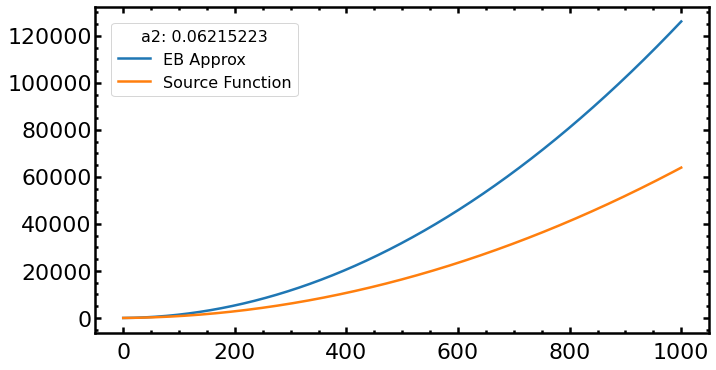

a0: 0.19171402255815484	a1: 1.808657856890837	a2: -0.062152234445906604


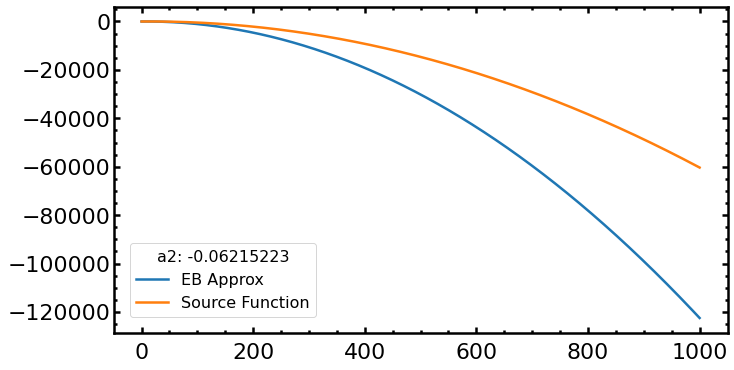

In [4]:
x_min = 0.001
x_max = 1000
density = 20000
points = round(density*(x_max-x_min))
x = np.linspace(x_min,x_max,points)
a0 = np.random.random()*2
a1 = np.random.random()*2
a2 = np.random.random()/10
# a2 = 0
mu = t = x
I_actual = a0 + a1*mu + 2*a2*mu**2
Sv = a0 + a1*t + a2*t**2

print(f'a0: {a0}\ta1: {a1}\ta2: {a2}')
plt.plot(x,I_actual,label=f'EB Approx')
plt.plot(x,Sv,label=f'Source Function')
plt.rcParams['legend.title_fontsize'] = 16
plt.legend(title=f'a2: {round(a2,8)}')
plt.show()

I_actual = a0 + a1*mu - 2*a2*mu**2
Sv = a0 + a1*t - a2*t**2

print(f'a0: {a0}\ta1: {a1}\ta2: {-a2}')
plt.plot(x,I_actual,label=f'EB Approx')
plt.plot(x,Sv,label=f'Source Function')
plt.rcParams['legend.title_fontsize'] = 16
plt.legend(title=f'a2: {round(-a2,8)}')
plt.show()

In [5]:
a0 = np.random.random()*2
a1 = np.random.random()*2
a2 = np.random.random()/10

# precision plot for x_max
x_min=0.001
x_max=1000
density=20000
x = np.linspace(100,10000,100)
y = [better_integrator_wrapper(x_min,x_max,density,dIdt,a0,a1,a2) for x_max in x]

mx = ave(x)
dy = np.diff(y)

plt.plot(mx,dy)
plt.yscale("log")
plt.xscale('log')
plt.show()

# precision plot for x_min
x_min=0.001
x_max=1000
density=20000
x = np.linspace(0.00001,0.1,1000)
y = [better_integrator_wrapper(x_min,x_max,density,dIdt,a0,a1,a2) for x_min in x]

mx = ave(x)
dy = np.diff(y)

plt.plot(mx,dy)
# plt.yscale("log")
plt.xscale('log')
plt.show()

# precision plot for density
x_min=0.001
x_max=1000
density=20000
x = np.linspace(1000,20000,100)
y = [better_integrator_wrapper(x_min,x_max,density,dIdt,a0,a1,a2) for density in x]

mx = ave(x)
dy = np.diff(y)

plt.plot(mx,dy)
plt.yscale("log")
plt.xscale('log')
plt.show()


In [ ]:
def Voigt(x, x0, y0, a, sigma, gamma):
    return y0 + a * np.real(wofz((x - x0 + 1j*gamma)/sigma/np.sqrt(2))) / sigma /np.sqrt(2*np.pi)

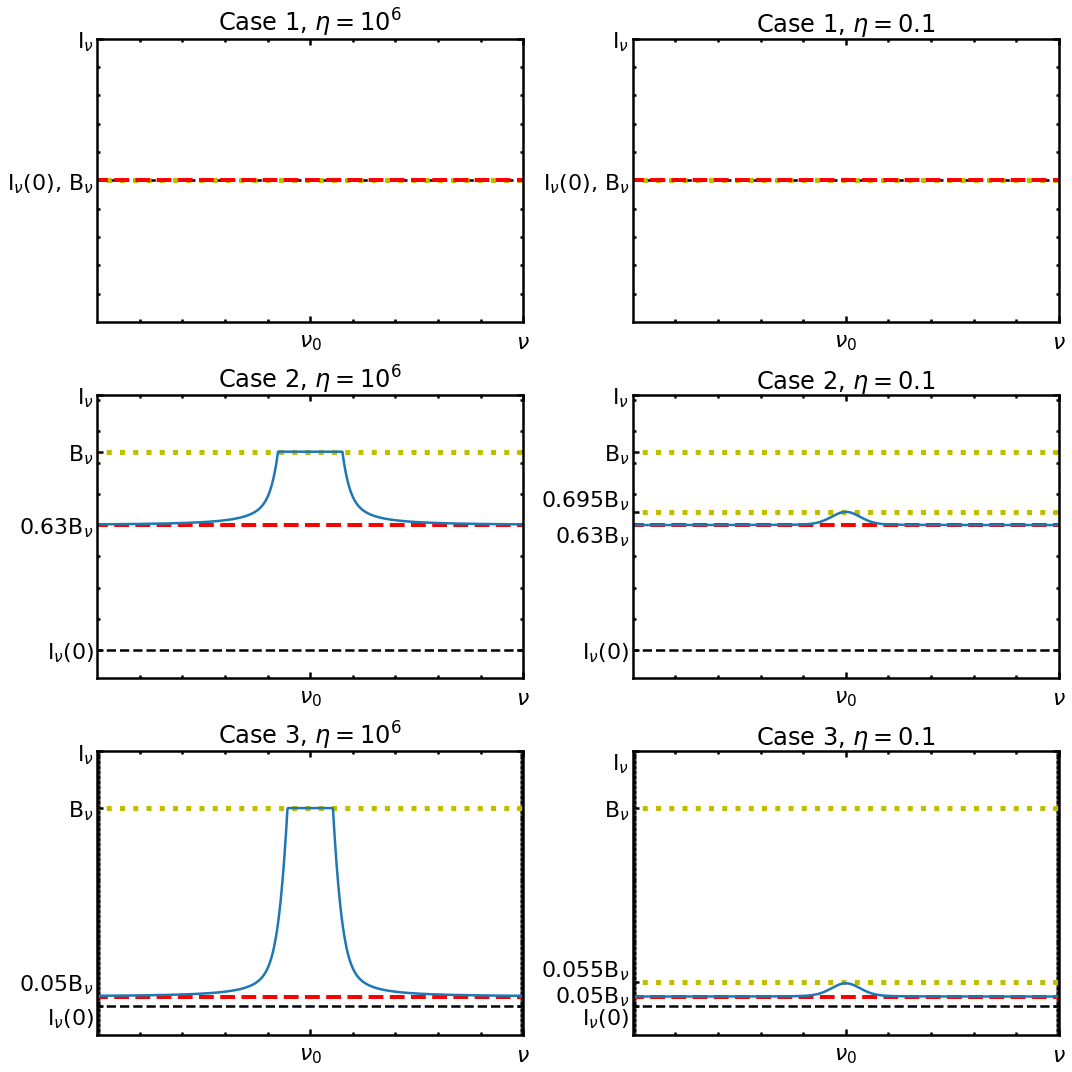

In [ ]:
fig, ax = plt.subplots(3,2,figsize=(15,15))
v0=50
Bv = 80
I0 = 10
x = np.linspace(0,100,1000)
etas=[2000,45]
eta_vals=[r'10$^6$','0.1']
continuum=[1,0.63,0.05]
for r in range(3):
    for c in range(2):
        eta=etas[c]
        eta_val=eta_vals[c]
        base=continuum[r]*(Bv-I0)+I0
        y = Voigt(x,v0,base,eta,3,1)
        y[y>Bv]=Bv
        if r+1==1:
            ax[r,c].hlines(y=50,xmin=-1,xmax=101,color='k',linestyle='--')
            ax[r,c].hlines(y=50,xmin=-1,xmax=101,color='y',linestyle=':',linewidth=5)
            ax[r,c].hlines(y=50,xmin=-1,xmax=101,color='r',linestyle='--',linewidth=4)
            y_L = [rf'I$_\nu(0)$, B$_\nu$',r'I$_\nu$']
            I_L = np.array([50,100])
            ax[r,c].set_yticks(I_L)
            ax[r,c].set_yticklabels(y_L)
        else:
            ax[r,c].hlines(y=I0,xmin=-1,xmax=101,color='k',linestyle='--')
            ax[r,c].hlines(y=Bv,xmin=-1,xmax=101,color='y',linestyle=':',linewidth=5)
            ax[r,c].hlines(y=base,xmin=-1,xmax=101,color='r',linestyle='--',linewidth=4)
            ax[r,c].plot(x,y)
            y_L = [rf'I$_\nu(0)$',rf'{continuum[r]}B$_\nu$',r'B$_\nu$',r'I$_\nu$']
            I_L = np.array([I0,base,Bv,100])
            ax[r,c].set_yticks(I_L)
            ax[r,c].set_yticklabels(y_L)
            if r+1 == 3:
                tick = ax[r,c].get_yticklabels()
                tick[0].set_verticalalignment("top")
                tick[1].set_verticalalignment("bottom")
            if c+1==2:
                if r+1==2:
                    emission = 0.695*(Bv-I0)+I0
                    ax[r,c].hlines(y=emission,xmin=-1,xmax=101,color='y',linestyle=':',linewidth=5)
                    ax[r,c].set_yticks(np.array([I0,base,emission,Bv,100]))
                    ax[r,c].set_yticklabels([rf'I$_\nu(0)$',rf'{continuum[r]}B$_\nu$',rf'0.695B$_\nu$',r'B$_\nu$',r'I$_\nu$'])
                    tick = ax[r,c].get_yticklabels()
                    tick[1].set_verticalalignment("top")
                    tick[2].set_verticalalignment("bottom")
                if r+1==3:
                    emission = 0.695*(Bv-I0)+I0-40
                    ax[r,c].hlines(y=emission,xmin=-1,xmax=101,color='y',linestyle=':',linewidth=5)
                    ax[r,c].set_yticks(np.array([I0,base,emission,Bv,100]))
                    ax[r,c].set_yticklabels([rf'I$_\nu(0)$',rf'{continuum[r]}B$_\nu$',rf'0.055B$_\nu$',r'B$_\nu$',r'I$_\nu$'])
                    tick = ax[r,c].get_yticklabels()
                    tick[1].set_verticalalignment("center")
                    tick[2].set_verticalalignment("bottom")
        xlabs = [r'$\nu_0$', r'$\nu$']
        vs = [v0,100]
        ax[r,c].set_xticks(vs)
        ax[r,c].set_xticklabels(xlabs)
        ax[r,c].set_xlim(0,100)
        ax[r,c].set_ylim(0,100)
        ax[r,c].title.set_text(rf'Case {r+1}, $\eta = ${eta_val}')
fig.tight_layout()
plt.show()